## Pada bulan dan jam berapa kualitas udara (PM2.5 atau PM10) paling buruk?

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv('assets/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [24]:
# Menghapus nilai kosong pada kolom PM2.5
df_clean = df.dropna(subset=['PM2.5'])

# Mengelompokkan data berdasarkan bulan dan jam, lalu menghitung rata-rata PM2.5
grouped = df_clean.groupby(['month', 'hour'])['PM2.5'].mean().reset_index()

# Menemukan bulan dan jam dengan rata-rata PM2.5 tertinggi
highest_pm25 = grouped[grouped['PM2.5'] == grouped['PM2.5'].max()]

# Menampilkan hasil
highest_pm25


,month,hour,PM2.5
287,12,23,153.375


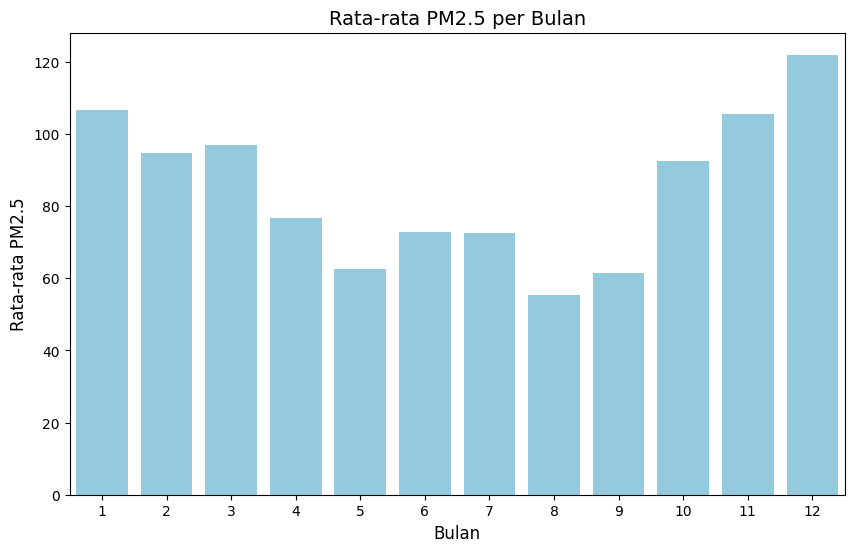

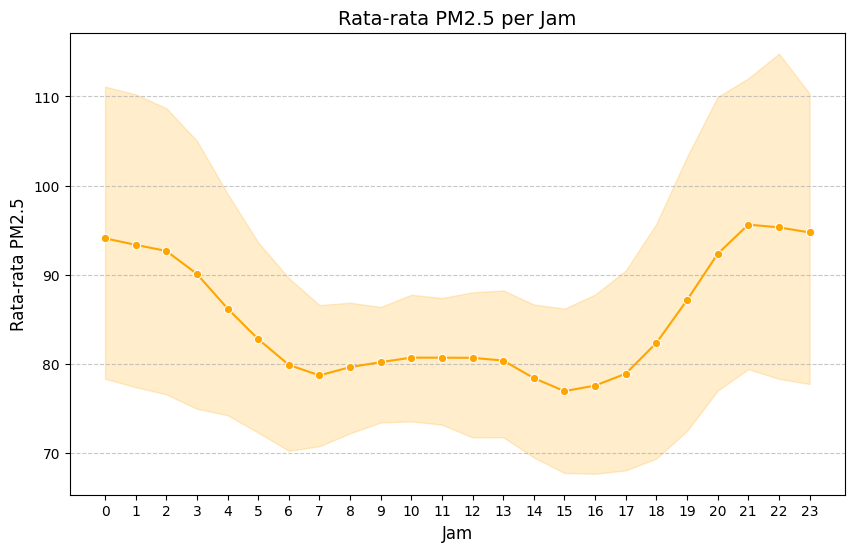

In [25]:
# Visualisasi rata-rata PM2.5 per bulan (dengan penyesuaian untuk FutureWarning)
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='month', y='PM2.5', errorbar=None, color="skyblue")
plt.title("Rata-rata PM2.5 per Bulan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata PM2.5", fontsize=12)
plt.xticks(range(0, 12), range(1, 13))
plt.show()

# Visualisasi rata-rata PM2.5 per jam (tidak terpengaruh peringatan sebelumnya)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='hour', y='PM2.5', marker='o', color="orange")
plt.title("Rata-rata PM2.5 per Jam", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata PM2.5", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
